## About the Dataset

The dataset is available on kaggle. Link to dataset - https://www.kaggle.com/muthuj7/weather-dataset .
The dataset consists of a total of 12 columns such as Humidity, Pressure, Visibility etc. I will try to predict the "Apparent Temperature" given all other attributes.
    

In [41]:
import pandas as pd
import numpy as np

## Reading the dataset

In [42]:
df=pd.read_csv("weatherHistory.csv")

In [43]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## Preprocessing Steps

In [44]:
# Checking for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [45]:
# There are 517 null rows in the above dataset and about 96k rows in the original data. so, we remove these rows from the dataset.
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [46]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
95931,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
95932,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
95933,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
95934,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [47]:
# checking data type of all 
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [48]:
df["New_Formatted_Date"]=df["Formatted Date"].apply(lambda x: x.replace('.000 +0200',''))
df["Final_Formatted_Date"]=df["New_Formatted_Date"].apply(lambda x: x.replace('.000 +0100',''))

In [49]:
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,New_Formatted_Date,Final_Formatted_Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006-04-01 00:00:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006-04-01 01:00:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006-04-01 02:00:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,2006-04-01 03:00:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,2006-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95931,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016-09-09 19:00:00
95932,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016-09-09 20:00:00
95933,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00,2016-09-09 21:00:00
95934,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00,2016-09-09 22:00:00


In [50]:
df.drop(columns=["Formatted Date","New_Formatted_Date"], inplace=True)

In [51]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Final_Formatted_Date
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
95931,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00
95932,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00
95933,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00
95934,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00


In [52]:
df["Date"]=df["Final_Formatted_Date"].apply(lambda x: x.strip())

In [53]:
df["Date"]=df["Final_Formatted_Date"].apply(lambda x: x[0:10])

In [54]:
df["Date"]

0        2006-04-01
1        2006-04-01
2        2006-04-01
3        2006-04-01
4        2006-04-01
            ...    
95931    2016-09-09
95932    2016-09-09
95933    2016-09-09
95934    2016-09-09
95935    2016-09-09
Name: Date, Length: 95936, dtype: object

In [55]:
df["Month"]= df["Date"].apply(lambda x: x[5:7])
df["Year"]= df["Date"].apply(lambda x: x[0:4])
df
#df["Date"]=pd.to_datetime(df["Date"],format="%Y-%M-%D", errors="coerce")

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Final_Formatted_Date,Date,Month,Year
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00,2006-04-01,04,2006
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00,2006-04-01,04,2006
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00,2006-04-01,04,2006
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00,2006-04-01,04,2006
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00,2006-04-01,04,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95931,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016-09-09 19:00:00,2016-09-09,09,2016
95932,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016-09-09 20:00:00,2016-09-09,09,2016
95933,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016-09-09 21:00:00,2016-09-09,09,2016
95934,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,2016-09-09 22:00:00,2016-09-09,09,2016


In [56]:
df["Month"]=df["Month"].astype(float)
df["Year"]=df["Year"].astype(float)

In [57]:
df.drop(columns=["Date","Final_Formatted_Date"],inplace=True)
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,4.0,2006.0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,4.0,2006.0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,4.0,2006.0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,4.0,2006.0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,4.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95931,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9.0,2016.0
95932,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9.0,2016.0
95933,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9.0,2016.0
95934,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9.0,2016.0


In [58]:
# Now the columns Summary, Prep Type and Daily Summary are all text. 
df["Precip Type"].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [59]:
df["Precip Type"]=df["Precip Type"].replace(["rain","snow"],[0,1])

In [60]:
df["Daily Summary"].value_counts()

Mostly cloudy throughout the day.         20020
Partly cloudy throughout the day.          9930
Partly cloudy until night.                 6169
Partly cloudy starting in the morning.     5177
Foggy in the morning.                      4201
                                          ...  
Rain until afternoon.                        17
Rain until morning.                          12
Light rain in the morning.                   11
Drizzle starting in the evening.              9
Light rain overnight.                         3
Name: Daily Summary, Length: 214, dtype: int64

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


In [62]:
lb=LabelEncoder()
df["Summary"]=lb.fit_transform(df["Summary"])

In [63]:
df["Daily Summary"]=lb.fit_transform(df["Daily Summary"])

In [64]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Month,Year
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,197,4.0,2006.0
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,197,4.0,2006.0
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,197,4.0,2006.0
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,197,4.0,2006.0
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,197,4.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95931,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,170,9.0,2016.0
95932,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,170,9.0,2016.0
95933,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,170,9.0,2016.0
95934,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,170,9.0,2016.0


In [65]:
df["Loud Cover"].value_counts() # all zeroes

0.0    95936
Name: Loud Cover, dtype: int64

In [66]:
df.drop(columns=["Loud Cover"],inplace=True)


In [67]:
df

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Month,Year
0,19,0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,197,4.0,2006.0
1,19,0,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,197,4.0,2006.0
2,17,0,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,197,4.0,2006.0
3,19,0,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,197,4.0,2006.0
4,17,0,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,197,4.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95931,19,0,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,170,9.0,2016.0
95932,19,0,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,170,9.0,2016.0
95933,19,0,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,170,9.0,2016.0
95934,19,0,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,170,9.0,2016.0


In [68]:
# Checking correlation of various attributes with the target variable
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

<function matplotlib.pyplot.show(*args, **kw)>

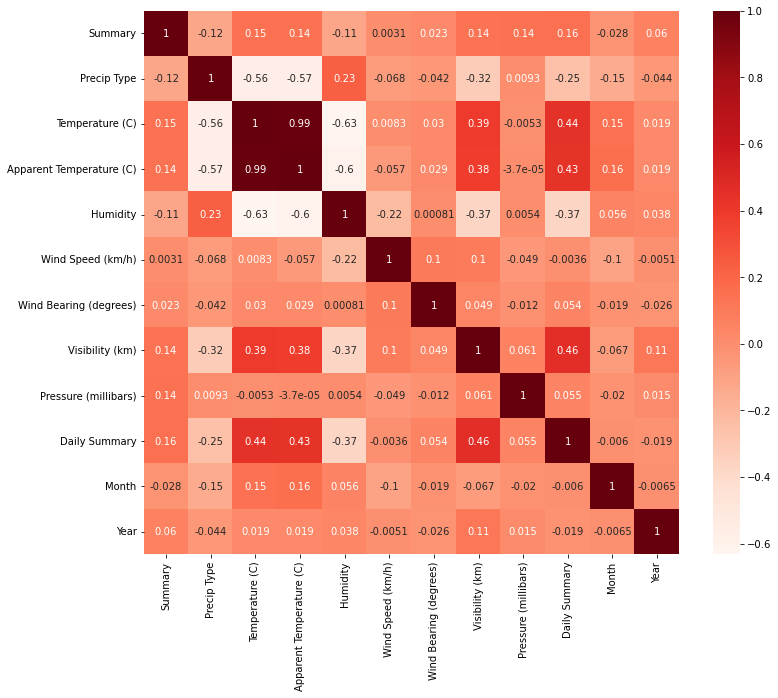

In [69]:
plt.figure(figsize=(12,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show

In [70]:
#Correlation with Target Variable
cor_target = abs(cor["Apparent Temperature (C)"])
non_relevant_features = cor_target[cor_target<0.14]
non_relevant_features

Wind Speed (km/h)         0.057387
Wind Bearing (degrees)    0.028951
Pressure (millibars)      0.000037
Year                      0.018877
Name: Apparent Temperature (C), dtype: float64

In [71]:
# The above columns have very less correlation with the target variable - Apparent Temperature so we can drop these

df.drop(columns=["Wind Speed (km/h)","Wind Bearing (degrees)","Pressure (millibars)","Year"])

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km),Daily Summary,Month
0,19,0,9.472222,7.388889,0.89,15.8263,197,4.0
1,19,0,9.355556,7.227778,0.86,15.8263,197,4.0
2,17,0,9.377778,9.377778,0.89,14.9569,197,4.0
3,19,0,8.288889,5.944444,0.83,15.8263,197,4.0
4,17,0,8.755556,6.977778,0.83,15.8263,197,4.0
...,...,...,...,...,...,...,...,...
95931,19,0,26.016667,26.016667,0.43,16.1000,170,9.0
95932,19,0,24.583333,24.583333,0.48,15.5526,170,9.0
95933,19,0,22.038889,22.038889,0.56,16.1000,170,9.0
95934,19,0,21.522222,21.522222,0.60,16.1000,170,9.0


In [72]:
df_y=df["Apparent Temperature (C)"]
df_x=df[["Summary","Precip Type","Temperature (C)","Humidity","Visibility (km)","Daily Summary","Month"]]



In [73]:
df_y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
95931    26.016667
95932    24.583333
95933    22.038889
95934    21.522222
95935    20.438889
Name: Apparent Temperature (C), Length: 95936, dtype: float64

In [74]:
# Performing normalization on data. Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [75]:
st_x= StandardScaler()
scaled_data=st_x.fit_transform(df_x)

In [76]:
scaled_data # This is a numpy array

array([[ 0.68553574, -0.35453109, -0.25795124, ...,  1.30910749,
         1.20125367, -0.72849667],
       [ 0.68553574, -0.35453109, -0.27014132, ...,  1.30910749,
         1.20125367, -0.72849667],
       [ 0.22637571, -0.35453109, -0.2678194 , ...,  1.10080599,
         1.20125367, -0.72849667],
       ...,
       [ 0.68553574, -0.35453109,  1.0550949 , ...,  1.37468389,
         0.72123121,  0.72098456],
       [ 0.68553574, -0.35453109,  1.00111025, ...,  1.37468389,
         0.72123121,  0.72098456],
       [ 0.68553574, -0.35453109,  0.88791662, ...,  1.23581623,
         0.72123121,  0.72098456]])

In [77]:
scaled_data_df=pd.DataFrame(scaled_data,columns = ["Summary","Precip Type","Temperature (C)","Humidity","Visibility (km)","Daily Summary","Month"])
scaled_data_df

,Summary,Precip Type,Temperature (C),Humidity,Visibility (km),Daily Summary,Month
0,0.685536,-0.354531,-0.257951,0.792748,1.309107,1.201254,-0.728497
1,0.685536,-0.354531,-0.270141,0.639470,1.309107,1.201254,-0.728497
2,0.226376,-0.354531,-0.267819,0.792748,1.100806,1.201254,-0.728497
3,0.685536,-0.354531,-0.381594,0.486192,1.309107,1.201254,-0.728497
4,0.226376,-0.354531,-0.332833,0.486192,1.309107,1.201254,-0.728497
...,...,...,...,...,...,...,...
95931,0.685536,-0.354531,1.470719,-1.557511,1.374684,0.721231,0.720985
95932,0.685536,-0.354531,1.320955,-1.302048,1.243531,0.721231,0.720985
95933,0.685536,-0.354531,1.055095,-0.893308,1.374684,0.721231,0.720985
95934,0.685536,-0.354531,1.001110,-0.688937,1.374684,0.721231,0.720985


In [78]:
final_data=pd.concat([scaled_data_df,df_y],axis=1)

In [79]:
final_data

,Summary,Precip Type,Temperature (C),Humidity,Visibility (km),Daily Summary,Month,Apparent Temperature (C)
0,0.685536,-0.354531,-0.257951,0.792748,1.309107,1.201254,-0.728497,7.388889
1,0.685536,-0.354531,-0.270141,0.639470,1.309107,1.201254,-0.728497,7.227778
2,0.226376,-0.354531,-0.267819,0.792748,1.100806,1.201254,-0.728497,9.377778
3,0.685536,-0.354531,-0.381594,0.486192,1.309107,1.201254,-0.728497,5.944444
4,0.226376,-0.354531,-0.332833,0.486192,1.309107,1.201254,-0.728497,6.977778
...,...,...,...,...,...,...,...,...
95931,0.685536,-0.354531,1.470719,-1.557511,1.374684,0.721231,0.720985,26.016667
95932,0.685536,-0.354531,1.320955,-1.302048,1.243531,0.721231,0.720985,24.583333
95933,0.685536,-0.354531,1.055095,-0.893308,1.374684,0.721231,0.720985,22.038889
95934,0.685536,-0.354531,1.001110,-0.688937,1.374684,0.721231,0.720985,21.522222


In [80]:
final_data.to_csv("./Preprocessed/Preprocessed_Data.csv")

In [81]:
final_data.to_pickle("./Preprocessed/Preprocessed_Data.pkl")